Importamos las librerías necesarias.

In [59]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset y preparamos los datos para analizarlos.

In [60]:
train_data_no_modified = pd.read_csv("train.csv")
test_data_no_modified = pd.read_csv("test.csv")

Mostramos el tipo de datos en cada columna y los primeros registros para entender el dataset.

In [61]:
print (train_data_no_modified.dtypes)
train_data_no_modified.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [62]:
print (test_data_no_modified.dtypes)
test_data_no_modified.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Información básica

In [63]:
train_num_rows, train_num_cols = train_data_no_modified.shape
print(f'Train data \nNumber of rows : {train_num_rows}\nNumber of columns: {train_num_cols}\n')

train_data_no_modified.info()

Train data 
Number of rows : 381109
Number of columns: 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [64]:
test_num_rows, test_num_cols = test_data_no_modified.shape
print(f'Train data \nNumber of rows : {test_num_rows}\nNumber of columns: {test_num_cols}\n')

test_data_no_modified.info()

Train data 
Number of rows : 127037
Number of columns: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


Revisamos la variable objetivo, es decir, la columna `Response` y como se distribuye.

In [65]:
categorias = train_data_no_modified['Response'].unique()
print("Categories:", categorias)
print(train_data_no_modified['Response'].value_counts())

Categories: [1 0]
Response
0    334399
1     46710
Name: count, dtype: int64


Ahora pasamos a revisar si hay NaNs, para ello calculamos la cantidad de valores nulos por columna y en todo el dataset.

In [66]:
print(train_data_no_modified.isna().sum())
print("\nLlavors, total de NaNs: ", train_data_no_modified.isna().sum().sum())
train_data_no_modified.isnull().sum()
print("Llavors, total de valors Null: ", train_data_no_modified.isnull().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Llavors, total de NaNs:  0
Llavors, total de valors Null:  0


In [67]:
print(test_data_no_modified.isna().sum())
print("\nLlavors, total de NaNs: ", test_data_no_modified.isna().sum().sum())
test_data_no_modified.isnull().sum()
print("nLlavors, total de valors Null: ", test_data_no_modified.isnull().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64



Llavors, total de NaNs:  0
nLlavors, total de valors Null:  0


Al ver que no tenemos NaNs podemos pasar a analizar la correlación, por lo que calculamos la correlación de los atributos numéricos con la variable objetivo `Response`.

Correlación entre cada atributo y la variable objetivo (Response):
id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Name: Response, dtype: float64


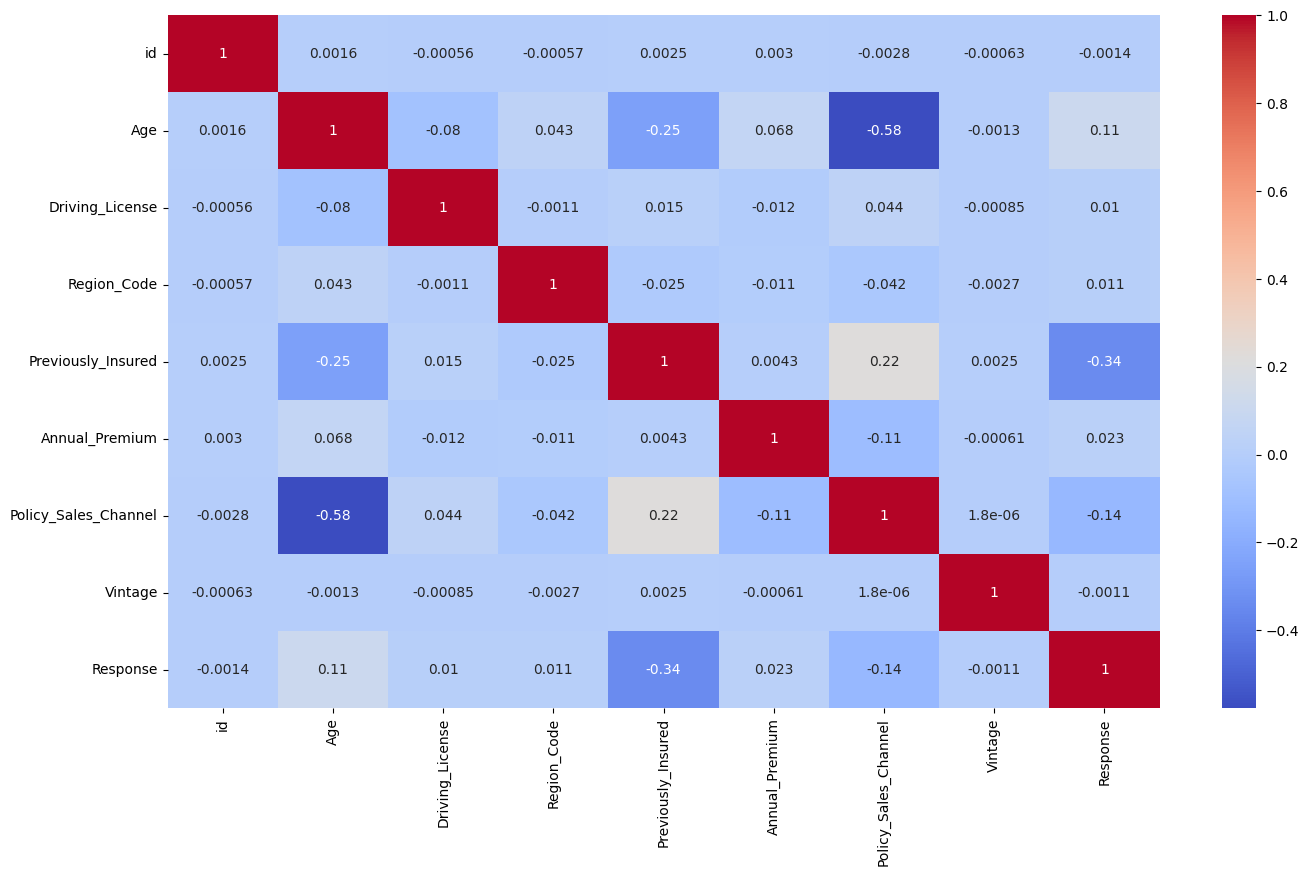

In [68]:
target = 'Response'
numeric_attributes = train_data_no_modified.select_dtypes(include=[np.number]).columns.tolist()
attributes = [k for k in numeric_attributes if k != target]

correlations = train_data_no_modified[attributes + [target]].corr()[target].drop(target)

print("Correlación entre cada atributo y la variable objetivo (Response):")
print(correlations)
plt.figure(figsize=(16,9))
sns.heatmap(train_data_no_modified[attributes + [target]].corr(), annot=True, cmap="coolwarm")
plt.show()

Ya podemos empezar a centrarnos en la transformación de los datos y lo hacemos eliminando columnas que creemos poco útiles y que creemos que no aportan significativamente al análisis. Para escoger estas columnas nos basamos en el resultado del heatmap y decidimos eliminar `id`, `Driving_License`, `Region_Code` y `Vintage`.

In [69]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
train_data_no_modified.drop(drop_column, axis=1, inplace = True)
train_data_no_modified

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,Male,74,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,0,> 2 Years,Yes,44617.0,124.0,0


In [70]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
test_data_no_modified.drop(drop_column, axis=1, inplace = True)
test_data_no_modified

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,Male,25,1,< 1 Year,No,35786.0,152.0
1,Male,40,0,1-2 Year,Yes,33762.0,7.0
2,Male,47,0,1-2 Year,Yes,40050.0,124.0
3,Male,24,1,< 1 Year,Yes,37356.0,152.0
4,Male,27,1,< 1 Year,No,59097.0,152.0
...,...,...,...,...,...,...,...
127032,Female,26,1,< 1 Year,No,30867.0,152.0
127033,Female,38,0,1-2 Year,Yes,28700.0,122.0
127034,Male,21,1,< 1 Year,No,29802.0,152.0
127035,Male,71,1,1-2 Year,No,62875.0,26.0


Para poder continuar realizamos la codificación de las variables categóricas, que en nuestro caso son `Gender`, `Vehicle_Age`, `Vehicle_Damage` para convertirlas a valores numéricos.

Empezamos con `Gender` pasando a 1 si es 'Male' y a 0 si es 'Female', por lo que al final los valores serán [1 0]

In [71]:
train_data_no_modified['Gender'] = train_data_no_modified['Gender'].map({'Male': 1, 'Female': 0})
test_data_no_modified['Gender'] = test_data_no_modified['Gender'].map({'Male': 1, 'Female': 0})

print(train_data_no_modified['Gender'].unique())
print(test_data_no_modified['Gender'].unique())
train_data_no_modified

[1 0]
[1 0]


,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,0,> 2 Years,Yes,40454.0,26.0,1
1,1,76,0,1-2 Year,No,33536.0,26.0,0
2,1,47,0,> 2 Years,Yes,38294.0,26.0,1
3,1,21,1,< 1 Year,No,28619.0,152.0,0
4,0,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,1,74,1,1-2 Year,No,30170.0,26.0,0
381105,1,30,1,< 1 Year,No,40016.0,152.0,0
381106,1,21,1,< 1 Year,No,35118.0,160.0,0
381107,0,68,0,> 2 Years,Yes,44617.0,124.0,0


In [72]:
train_data_no_modified['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

En el caso de `Vehicle_Age` encontramos 3 posibilidades, por lo que los posibles valores deben ser [2 1 0], siendo 0 para '< 1 Year', 1 para '1-2 Year' y 2 para '> 2 Years'.

In [73]:
train_data_no_modified['Vehicle_Age'] = train_data_no_modified['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
test_data_no_modified['Vehicle_Age'] = test_data_no_modified['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
print(train_data_no_modified[['Vehicle_Age']].head())
print(train_data_no_modified['Vehicle_Age'].unique())

   Vehicle_Age
0            2
1            1
2            2
3            0
4            0
[2 1 0]


Para `Vehicle_Damage` tenemos 2 casos posibles, que son 'Yes', el cual transformaremos en 1 y 'No', que transformaremos en 0; así obtenemos las posibilidades [1 0].

In [74]:
train_data_no_modified['Vehicle_Damage'] = train_data_no_modified['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(train_data_no_modified[['Vehicle_Damage']].head())
print(train_data_no_modified['Vehicle_Damage'].unique())
test_data_no_modified['Vehicle_Damage'] = test_data_no_modified['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(test_data_no_modified[['Vehicle_Damage']].head())
print(test_data_no_modified['Vehicle_Damage'].unique())

   Vehicle_Damage
0               1
1               0
2               1
3               0
4               0
[1 0]
   Vehicle_Damage
0               0
1               1
2               1
3               1
4               0
[0 1]


Para ver la tabla después de las correcciones anteriores la volvemos a mostrar.

In [75]:
train_data = train_data_no_modified
train_data.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,0,2,1,40454.0,26.0,1
1,1,76,0,1,0,33536.0,26.0,0
2,1,47,0,2,1,38294.0,26.0,1
3,1,21,1,0,0,28619.0,152.0,0
4,0,29,1,0,0,27496.0,152.0,0


In [76]:
test_data = test_data_no_modified
test_data.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,1,25,1,0,0,35786.0,152.0
1,1,40,0,1,1,33762.0,7.0
2,1,47,0,1,1,40050.0,124.0
3,1,24,1,0,1,37356.0,152.0
4,1,27,1,0,0,59097.0,152.0


In [77]:
hig_corr = train_data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

Además para entender mejor la distribución de valores por columna mostramos histogramas.

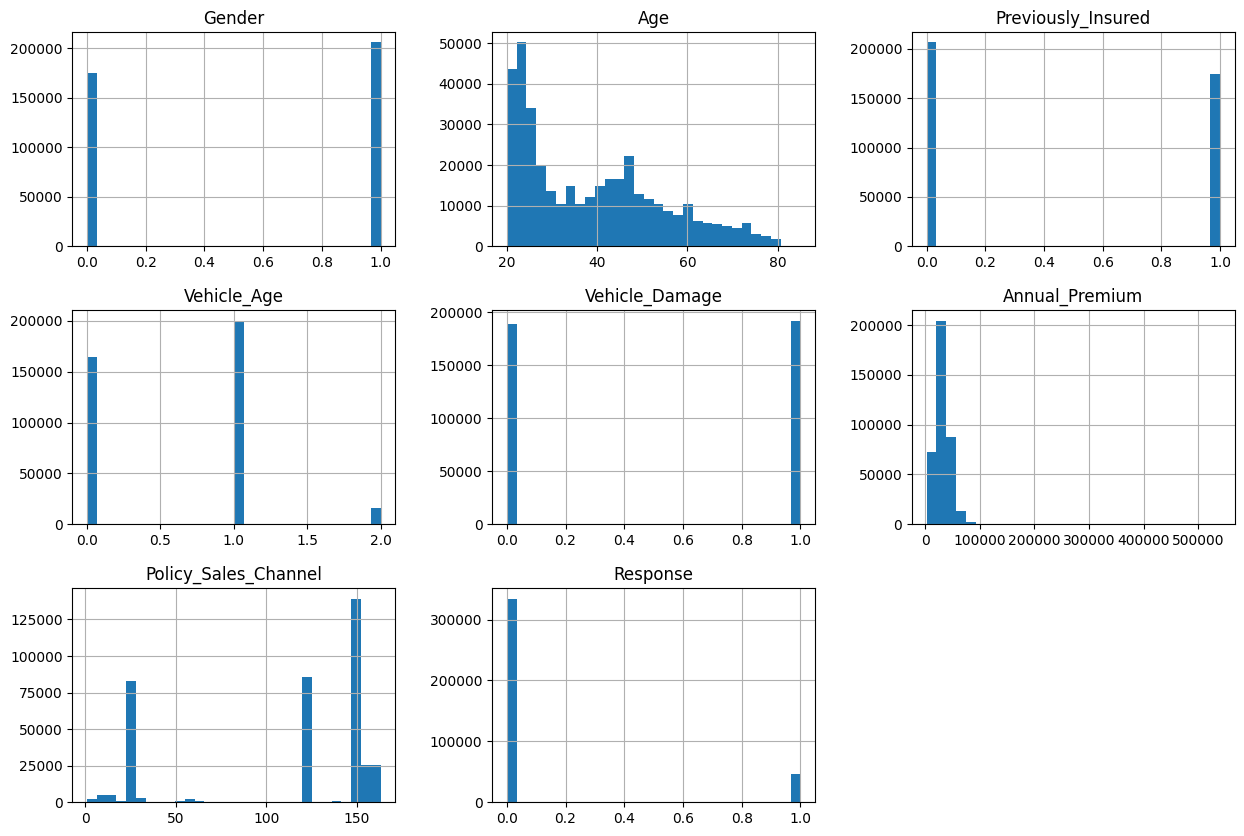

In [78]:
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

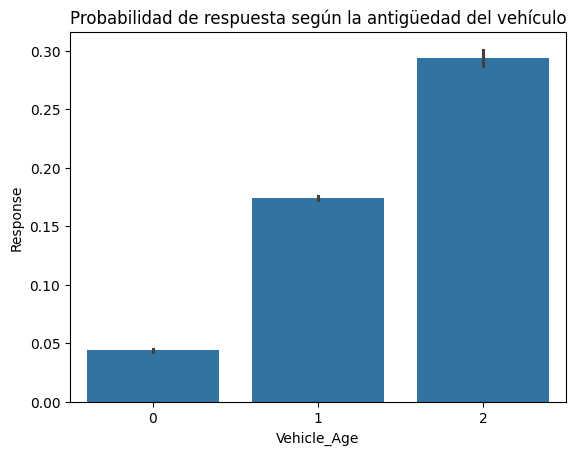

In [79]:
sns.barplot(x="Vehicle_Age", y="Response", data=train_data)
plt.title("Probabilidad de respuesta según la antigüedad del vehículo")
plt.show()

La mitjana de persones que estan interessades es: 12.256336113815209 %


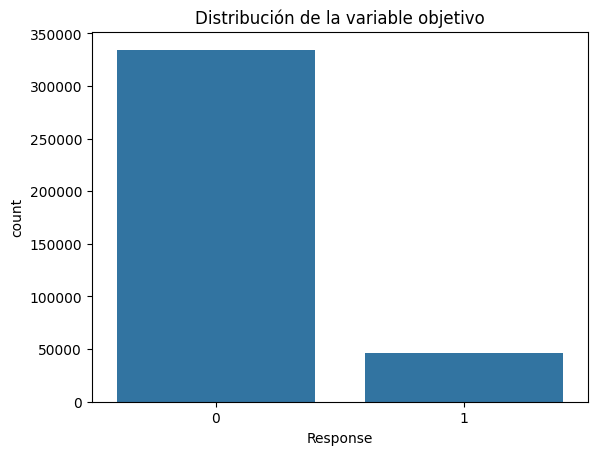

In [80]:
print("La mitjana de persones que estan interessades es:", (train_data[target].mean())*100, "%")
sns.countplot(x=target, data=train_data)
plt.title("Distribución de la variable objetivo")
plt.show()

In [81]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=['Age','Annual_Premium','Policy_Sales_Channel']
scaler=MinMaxScaler()
scaler.fit(train_data[numeric_cols])
train_data[numeric_cols]=scaler.transform(train_data[numeric_cols])
test_data[numeric_cols]=scaler.transform(test_data[numeric_cols])

Al ver la gran diferencia en `Response` de 0 y 1 decidimos hacer oversampling para obtener resultados más precisos.

Métodos de aprendizaje

In [82]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Columnes d'entrada i variable objectiu
input_cols = train_data.columns[:-1].tolist()  # Totes les columnes menys l'última
target_col = 'Response'  # Variable objectiu

# Separar entrades i objectiu
inputs = train_data[input_cols]
targets = train_data[target_col]

# Aplicar SMOTE al conjunt d'entrenament
smote = SMOTE(random_state=42)
inputs_smote, targets_smote = smote.fit_resample(inputs, targets)

# Divisió entre conjunt d'entrenament i validació
train_inputs_smote, val_inputs_smote, train_targets_smote, val_targets_smote = train_test_split(
    inputs_smote, 
    targets_smote, 
    test_size=0.2, 
    random_state=42
)

In [83]:
# Entrenar el model de regressió logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar
threshold = 0.5

# Prediccions pel conjunt d'entrenament
train_pred_probs = model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació pel conjunt d'entrenament
print("Classification Report (Train) - SMOTE:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")

# Avaluació pel conjunt de validació
print("Classification Report (Validation) - SMOTE: ")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")

Classification Report (Train) - SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267624
           1       0.70      0.98      0.82    267414

    accuracy                           0.78    535038
   macro avg       0.83      0.78      0.77    535038
weighted avg       0.83      0.78      0.77    535038

AUC-ROC (Train): 0.8312
Classification Report (Validation) - SMOTE: 
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66775
           1       0.71      0.98      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760

AUC-ROC (Validation): 0.8338


In [84]:
from sklearn.model_selection import train_test_split

# Columnes d'entrada i variable objectiu
input_cols = train_data.columns[:-1].tolist()  # Totes les columnes menys l'última
target_col = 'Response'  # Variable objectiu

# Separar entrades i objectiu
inputs = train_data[input_cols]
targets = train_data[target_col]

# Divisió entre conjunt d'entrenament i validació
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, 
    targets, 
    test_size=0.2, 
    random_state=42
)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

# Entrenar el model de regressió logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(train_inputs, train_targets)

# Ajust del llindar
threshold = 0.5

# Prediccions pel conjunt d'entrenament
train_pred_probs = model.predict_proba(train_inputs)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = model.predict_proba(val_inputs)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació pel conjunt d'entrenament
print("Classification Report (Train):")
print(classification_report(train_targets, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets, train_pred_probs):.4f}")
train_accuracy = accuracy_score(train_targets, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Avaluació pel conjunt de validació
print("Classification Report (Validation):")
print(classification_report(val_targets, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets, val_pred_probs):.4f}")
val_accuracy = accuracy_score(val_targets, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267700
           1       0.37      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.62      0.50      0.47    304887
weighted avg       0.82      0.88      0.82    304887

AUC-ROC (Train): 0.8309
Training Accuracy: 0.8779
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.45      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.66      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222

AUC-ROC (Validation): 0.8353
Validation Accuracy: 0.8750


RandomForest

Ara comprovem amb altres models: Random Forest, Gradient Boosting y KNN.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

# Crear el model de Random Forest centrat en el Recall
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    random_state=42
)

# Entrenar el model amb les dades SMOTE
rf_model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar de predicció
threshold = 0.3

# Prediccions pel conjunt d'entrenament
train_pred_probs = rf_model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = rf_model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació del conjunt d'entrenament
train_accuracy = accuracy_score(train_targets_smote, train_pred)
print("Classification Report (Train) - Random Forest:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Avaluació del conjunt de validació
val_accuracy = accuracy_score(val_targets_smote, val_pred)
print("Classification Report (Validation) - Random Forest:")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Classification Report (Train) - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.60      0.74    267624
           1       0.71      0.98      0.83    267414

    accuracy                           0.79    535038
   macro avg       0.84      0.79      0.78    535038
weighted avg       0.84      0.79      0.78    535038

AUC-ROC (Train): 0.8635
Training Accuracy: 0.7917
Classification Report (Validation) - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     66775
           1       0.71      0.98      0.83     66985

    accuracy                           0.79    133760
   macro avg       0.84      0.79      0.78    133760
weighted avg       0.84      0.79      0.78    133760

AUC-ROC (Validation): 0.8639
Validation Accuracy: 0.7927


Feature Importance (Random Forest):
                Feature  Importance
4        Vehicle_Damage    0.390425
2    Previously_Insured    0.351478
1                   Age    0.137091
6  Policy_Sales_Channel    0.078116
3           Vehicle_Age    0.031011
5        Annual_Premium    0.008974
0                Gender    0.002905


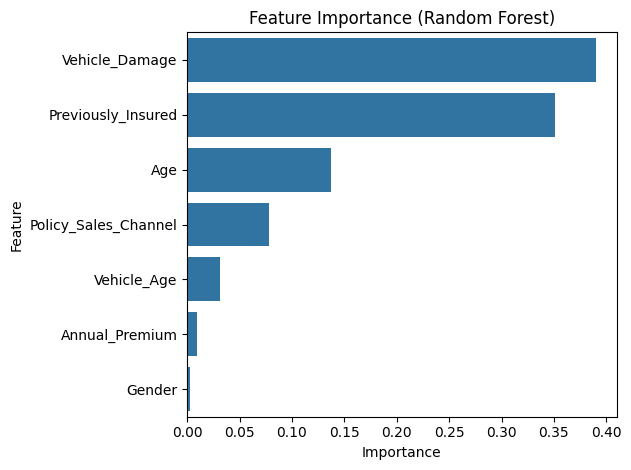

In [87]:
# Importar les llibreries necessàries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el model Random Forest amb les dades generades amb SMOTE
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(train_inputs_smote, train_targets_smote)  # Entrenem amb el conjunt d'entrenament generat amb SMOTE

# Obtenir la importància de les característiques
feature_importance = pd.DataFrame({
    'Feature': train_inputs_smote.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar les importàncies
print("Feature Importance (Random Forest):")
print(feature_importance)

# Visualitzar les importàncies
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Realitzem una cerca d'hiperparàmetres per Random Forest utilitzant RandomizedSearch.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definició dels paràmetres a cercar
param_dist = {
    'n_estimators': [50, 75, 100, 150],  # Nombre d'arbres al bosc
    'max_depth': [10, 15, 20, None],  # Profunditat màxima dels arbres
    'min_samples_split': [5, 10, 15],  # Mínim de mostres per dividir un node
    'min_samples_leaf': [2, 4, 6]  # Mínim de mostres per node fulla
}

# Configuració de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Model de Random Forest
    param_distributions=param_dist,  # Distribució dels paràmetres
    scoring='roc_auc',  # Mètrica per avaluar
    n_iter=15,  # Número de combinacions a provar (augmentat per millor cobertura)
    cv=3,  # Nombre de divisions de cross-validation
    verbose=2,  # Nivell de detall de sortida
    n_jobs=-1,  # Utilitza tots els nuclis disponibles
    random_state=42  # Fixar random_state per reproduïbilitat
)

# Ajustar el model al conjunt d'entrenament amb SMOTE
random_search.fit(train_inputs_smote, train_targets_smote)

# Resultats dels millors paràmetres i AUC-ROC
print("Best parameters found:")
print(random_search.best_params_)
best_params = random_search.best_params_
print(f"Best AUC-ROC: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters found:
{'n_estimators': 75, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': None}
Best AUC-ROC: 0.8969


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

# Crear el model de Random Forest amb els millors paràmetres
rf_model = RandomForestClassifier(
    **best_params,  # Utilitzar els millors paràmetres
    random_state=42
)

# Entrenar el model amb les dades SMOTE
rf_model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar de predicció
threshold = 0.3

# Prediccions pel conjunt d'entrenament
train_pred_probs = rf_model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = rf_model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació del conjunt d'entrenament
train_accuracy = accuracy_score(train_targets_smote, train_pred)
print("Classification Report (Train) - Random Forest:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Avaluació del conjunt de validació
val_accuracy = accuracy_score(val_targets_smote, val_pred)
print("Classification Report (Validation) - Random Forest:")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Classification Report (Train) - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82    267624
           1       0.77      0.99      0.86    267414

    accuracy                           0.85    535038
   macro avg       0.88      0.85      0.84    535038
weighted avg       0.88      0.85      0.84    535038

AUC-ROC (Train): 0.9612
Training Accuracy: 0.8451
Classification Report (Validation) - Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     66775
           1       0.75      0.97      0.85     66985

    accuracy                           0.82    133760
   macro avg       0.86      0.82      0.82    133760
weighted avg       0.85      0.82      0.82    133760

AUC-ROC (Validation): 0.9037
Validation Accuracy: 0.8223


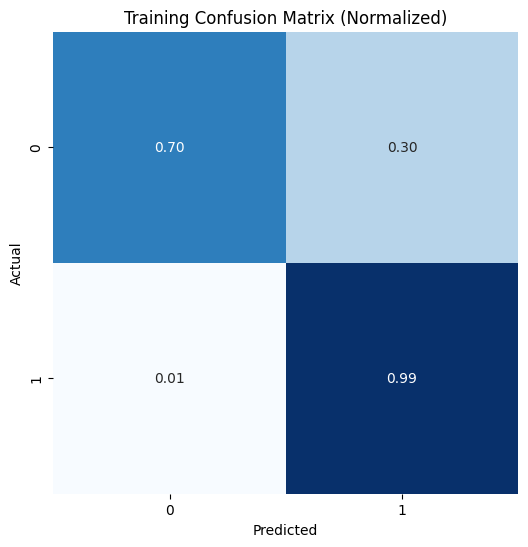

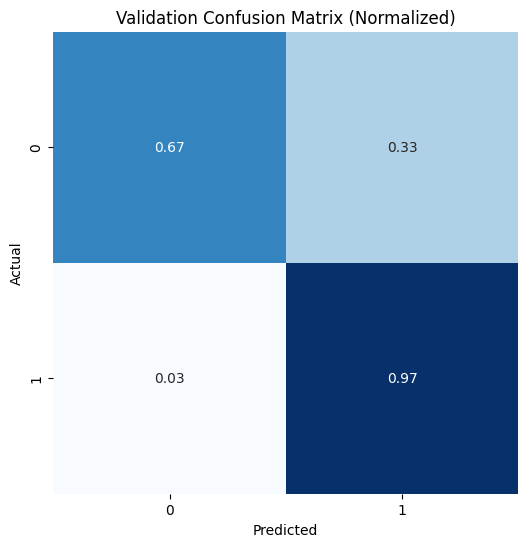

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediccions pel conjunt d'entrenament
train_cm = confusion_matrix(train_targets_smote, train_pred, normalize='true')

# Prediccions pel conjunt de validació
val_cm = confusion_matrix(val_targets_smote, val_pred, normalize='true')

# Matriu de confusió pel conjunt d'entrenament
plt.figure(figsize=(6, 6))
sns.heatmap(train_cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("Training Confusion Matrix (Normalized)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Matriu de confusió pel conjunt de validació
plt.figure(figsize=(6, 6))
sns.heatmap(val_cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("Validation Confusion Matrix (Normalized)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


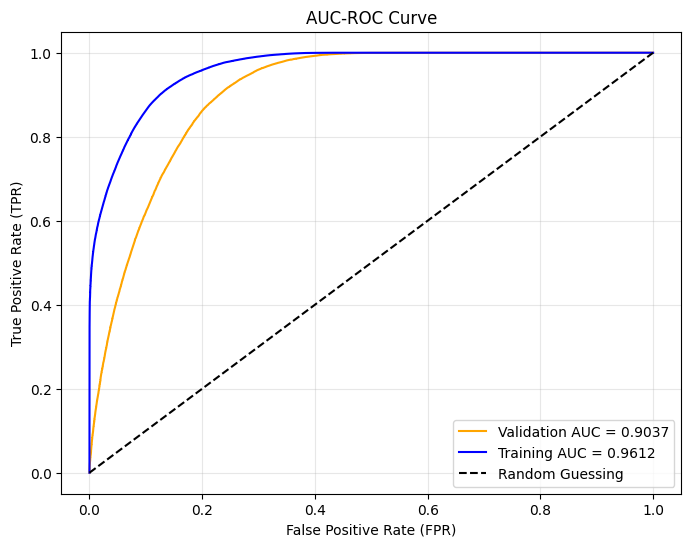

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular els valors necessaris per a la corba AUC-ROC al conjunt de validació
fpr, tpr, thresholds = roc_curve(val_targets_smote, val_pred_probs)
roc_auc = auc(fpr, tpr)

# Calcular també per al conjunt d'entrenament
fpr_train, tpr_train, thresholds_train = roc_curve(train_targets_smote, train_pred_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Traçar la corba AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Validation AUC = {roc_auc:.4f}", color='orange')
plt.plot(fpr_train, tpr_train, label=f"Training AUC = {roc_auc_train:.4f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Línia diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

XBoost, model d'aprenentatge més avançat per comparar resultats

In [92]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score


# Crear el model de XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Per evitar warnings amb XGBoost
)

# Entrenar el model amb les dades SMOTE
xgb_model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar de predicció
threshold = 0.3

# Prediccions pel conjunt d'entrenament
train_pred_probs = xgb_model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = xgb_model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació del conjunt d'entrenament
train_accuracy = accuracy_score(train_targets_smote, train_pred)
print("Classification Report (Train) - XGBoost:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Avaluació del conjunt de validació
val_accuracy = accuracy_score(val_targets_smote, val_pred)
print("Classification Report (Validation) - XGBoost:")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

d:\Programas2\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Train) - XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75    267624
           1       0.71      0.98      0.83    267414

    accuracy                           0.79    535038
   macro avg       0.84      0.79      0.79    535038
weighted avg       0.84      0.79      0.79    535038

AUC-ROC (Train): 0.8740
Training Accuracy: 0.7942
Classification Report (Validation) - XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     66775
           1       0.72      0.98      0.83     66985

    accuracy                           0.80    133760
   macro avg       0.84      0.80      0.79    133760
weighted avg       0.84      0.80      0.79    133760

AUC-ROC (Validation): 0.8754
Validation Accuracy: 0.7955


Feature Importance (XGBoost):
                Feature  Importance
2    Previously_Insured    0.488422
4        Vehicle_Damage    0.488026
1                   Age    0.009024
6  Policy_Sales_Channel    0.007090
3           Vehicle_Age    0.004194
0                Gender    0.001819
5        Annual_Premium    0.001426


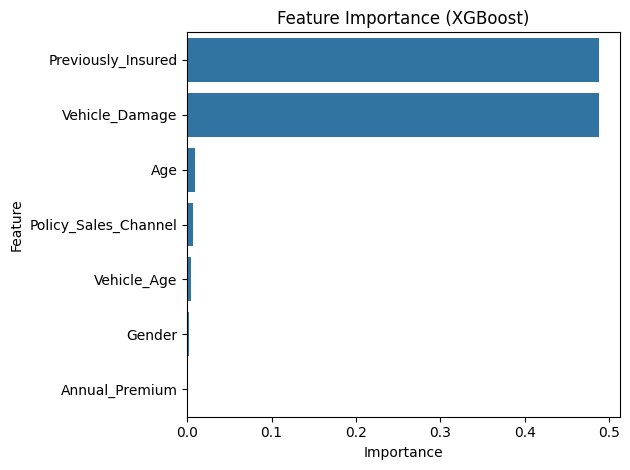

In [93]:
# Feature Importance per XGBoost
feature_importance = pd.DataFrame({
    'Feature': train_inputs_smote.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (XGBoost):")
print(feature_importance)

sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Busqueda de Hyperparametros

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definició dels hiperparàmetres a cercar
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],  # Nombre d'arbres
    'max_depth': [3, 5, 7, 10, 15, 20],  # Profunditat màxima
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Velocitat d'aprenentatge
    'subsample': [0.5, 0.6, 0.7, 0.8, 1.0],  # Percentatge de dades utilitzades per arbre
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],  # Percentatge de columnes utilitzades per arbre
    'min_child_weight': [1, 3, 5, 7],  # Pes mínim necessari per dividir un node
    'gamma': [0, 0.1, 0.2, 0.3, 0.5]  # Penalització de complexitat
}

# Configuració del RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),  # Model base
    param_distributions=param_dist,  # Hiperparàmetres a cercar
    scoring='roc_auc',  # Mètrica per optimitzar
    n_iter=30,  # Nombre de combinacions a provar 
    cv=3,  # Cross-validation
    verbose=2,  # Sortida detallada
    random_state=42,  # Per reproduïbilitat
    n_jobs=-1  # Utilitza tots els nuclis disponibles
)

# Ajustar el RandomizedSearchCV amb les dades d'entrenament SMOTE
xgb_random_search.fit(train_inputs_smote, train_targets_smote)

# Resultats dels millors paràmetres i AUC-ROC
print("Best parameters found:")
print(xgb_random_search.best_params_)
print(f"Best AUC-ROC: {xgb_random_search.best_score_:.4f}")

# Guardar els millors paràmetres
best_xgb_params = xgb_random_search.best_params_


Fitting 3 folds for each of 30 candidates, totalling 90 fits

d:\Programas2\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best AUC-ROC: 0.8937


In [95]:
# Entrenar el model amb els millors paràmetres
best_xgb_model = XGBClassifier(**best_xgb_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(train_inputs_smote, train_targets_smote)

# Prediccions pel conjunt de validació
val_pred_probs = best_xgb_model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= 0.3).astype(int)  # Ajustar el llindar a 0.3 per minimitzar falsos negatius

# Avaluació del conjunt d'entrenament
train_accuracy = accuracy_score(train_targets_smote, train_pred)
print("Classification Report (Train) - Best XGBoost:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Avaluació del conjunt de validació
val_accuracy = accuracy_score(val_targets_smote, val_pred)
print("Classification Report (Validation) - Best XGBoost:")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

d:\Programas2\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Train) - Best XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75    267624
           1       0.71      0.98      0.83    267414

    accuracy                           0.79    535038
   macro avg       0.84      0.79      0.79    535038
weighted avg       0.84      0.79      0.79    535038

AUC-ROC (Train): 0.8740
Training Accuracy: 0.7942
Classification Report (Validation) - Best XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     66775
           1       0.74      0.98      0.84     66985

    accuracy                           0.81    133760
   macro avg       0.85      0.81      0.81    133760
weighted avg       0.85      0.81      0.81    133760

AUC-ROC (Validation): 0.8981
Validation Accuracy: 0.8149


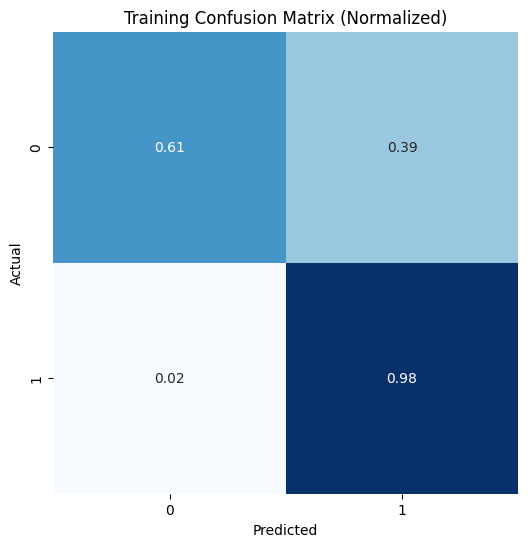

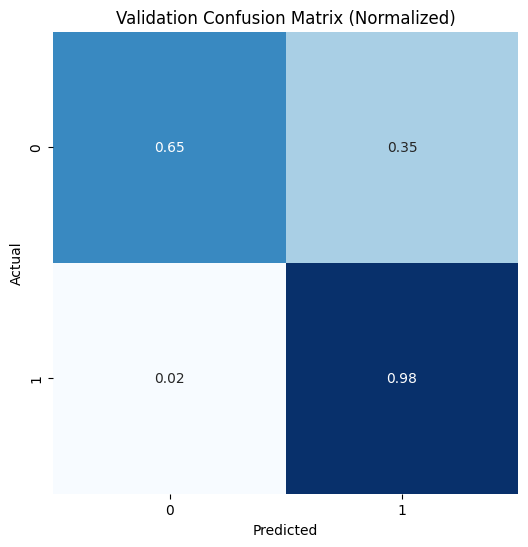

In [96]:
# Matriu de confusió pel conjunt d'entrenament
train_cm = confusion_matrix(train_targets_smote, train_pred, normalize='true')

# Matriu de confusió pel conjunt de validació
val_cm = confusion_matrix(val_targets_smote, val_pred, normalize='true')

# Matriu de confusió pel conjunt d'entrenament
plt.figure(figsize=(6, 6))
sns.heatmap(train_cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("Training Confusion Matrix (Normalized)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Matriu de confusió pel conjunt de validació
plt.figure(figsize=(6, 6))
sns.heatmap(val_cm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("Validation Confusion Matrix (Normalized)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

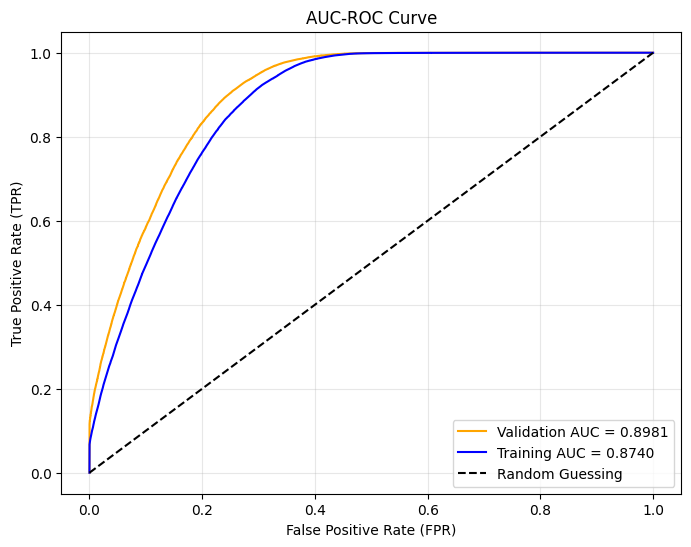

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular els valors necessaris per a la corba AUC-ROC al conjunt de validació
fpr, tpr, thresholds = roc_curve(val_targets_smote, val_pred_probs)
roc_auc = auc(fpr, tpr)

# Calcular també per al conjunt d'entrenament
fpr_train, tpr_train, thresholds_train = roc_curve(train_targets_smote, train_pred_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Traçar la corba AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Validation AUC = {roc_auc:.4f}", color='orange')
plt.plot(fpr_train, tpr_train, label=f"Training AUC = {roc_auc_train:.4f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Línia diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
